In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [4]:
# Read data
charity_df = pd.read_csv("charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
charity_df_relevant = charity_df.drop(columns=['EIN','NAME'])
string_dtypes = charity_df_relevant.dtypes[charity_df_relevant.dtypes=='object'].index
charity_df_relevant[string_dtypes].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

C1000    17326
Other    10899
C2000     6074
Name: CLASSIFICATION, dtype: int64

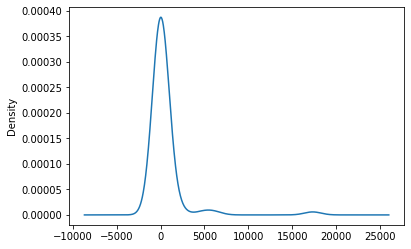

In [6]:
classification_counts = charity_df_relevant.CLASSIFICATION.value_counts()

classification_counts.plot.density()
#determine which values to replace
replace_classifications = list(classification_counts[classification_counts < 5000].index)

#replace dataframe
for classification in replace_classifications:
    charity_df_relevant.CLASSIFICATION = charity_df_relevant.CLASSIFICATION.replace(classification,"Other")

    
#Check
charity_df_relevant.CLASSIFICATION.value_counts()

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)#fit_transform
enc.fit(charity_df_relevant[string_dtypes])
one_hot_encoded_df = pd.DataFrame(enc.transform(charity_df_relevant[string_dtypes]), columns=enc.get_feature_names())
one_hot_encoded_df.head()

,x0_T10,x0_T12,x0_T13,x0_T14,x0_T15,x0_T17,x0_T19,x0_T2,x0_T25,x0_T29,...,x5_1-9999,x5_10000-24999,x5_100000-499999,x5_10M-50M,x5_1M-5M,x5_25000-99999,x5_50M+,x5_5M-10M,x6_N,x6_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
charity_relevant_encoded_df = pd.merge(charity_df_relevant, one_hot_encoded_df, left_index =True, right_index=True)
charity_relevant_encoded_df = charity_relevant_encoded_df.drop(string_dtypes,1)
charity_relevant_encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,x0_T10,x0_T12,x0_T13,x0_T14,x0_T15,x0_T17,x0_T19,...,x5_1-9999,x5_10000-24999,x5_100000-499999,x5_10M-50M,x5_1M-5M,x5_25000-99999,x5_50M+,x5_5M-10M,x6_N,x6_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
y = charity_relevant_encoded_df.IS_SUCCESSFUL
X = charity_relevant_encoded_df.drop(columns='IS_SUCCESSFUL')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=78)

In [10]:
#from sklearn preprocessing 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
len(X_train_scaled[0])

48

In [15]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  96
hidden_nodes_layer2 = 48

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#Compile the sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])

#Train the model
fit_model =nn.fit(X_train_scaled, y_train.values, epochs=50)

# Check the structure of the model
nn.summary()

#Evaluate the model using test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test.values,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 3s 115us/sample - loss: 0.5767 - accuracy: 0.7185
Epoch 2/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5645 - accuracy: 0.7259
Epoch 3/50
25724/25724 [==============================] - 2s 91us/sample - loss: 0.5609 - accuracy: 0.7250
Epoch 4/50
25724/25724 [==============================] - 2s 90us/sample - loss: 0.5595 - accuracy: 0.7279
Epoch 5/50
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5576 - accuracy: 0.7265
Epoch 6/50
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5573 - accuracy: 0.7283
Epoch 7/50
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5555 - accuracy: 0.7283
Epoch 8/50
25724/25724 [==============================] - 4s 164us/sample - loss: 0.5555 - accuracy: 0.7290
Epoch 9/50
25724/25724 [==============================] - 4s 169us/sample - loss: 0.5552 - accuracy: 0.7277
Epoch 10/50